## **Task 1:**

**Perform the necessary pre-processing on the dataset and conduct exploratory data analysis to gain insights into the data. Apply Decision Tree Classifier to classify the species, plot the tree and evaluate its performance by displaying key metrics such as the confusion matrix, classification report, accuracy, precision, recall and f1-score. Do hyperparameter tuning, if necessary.** 


#### Steps to follow:
1. Preprocess the data
2. Perform EDA
3. Train the model
4. Plot the decision tree
5. Evaluate its performance by displaying key metrics such as the confusion matrix, classification report, accuracy, precision, recall and f1-score.
6. Hyperparameter Tuning (If necessary)

### **1. & 2.  Preprocess the data and perform EDA**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('DJS-compute-tasks/Task 4/Decision Tree/Data/penguins.csv')

In [3]:
df.head(20)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [6]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [7]:
df.shape

(344, 8)

In [8]:
df.dropna().shape

(333, 8)

In [9]:
print('The % of null values in the data are: ' + str((11 / 344 ) * 100))

The % of null values in the data are: 3.1976744186046515


**There will not be much data loss if we drop these null values but they can also be easily be imputed as well, so imputation will be done after the data is split into train and test splits**

In [10]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [11]:
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [12]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [13]:
df['sex'].unique()

array(['male', 'female', nan], dtype=object)

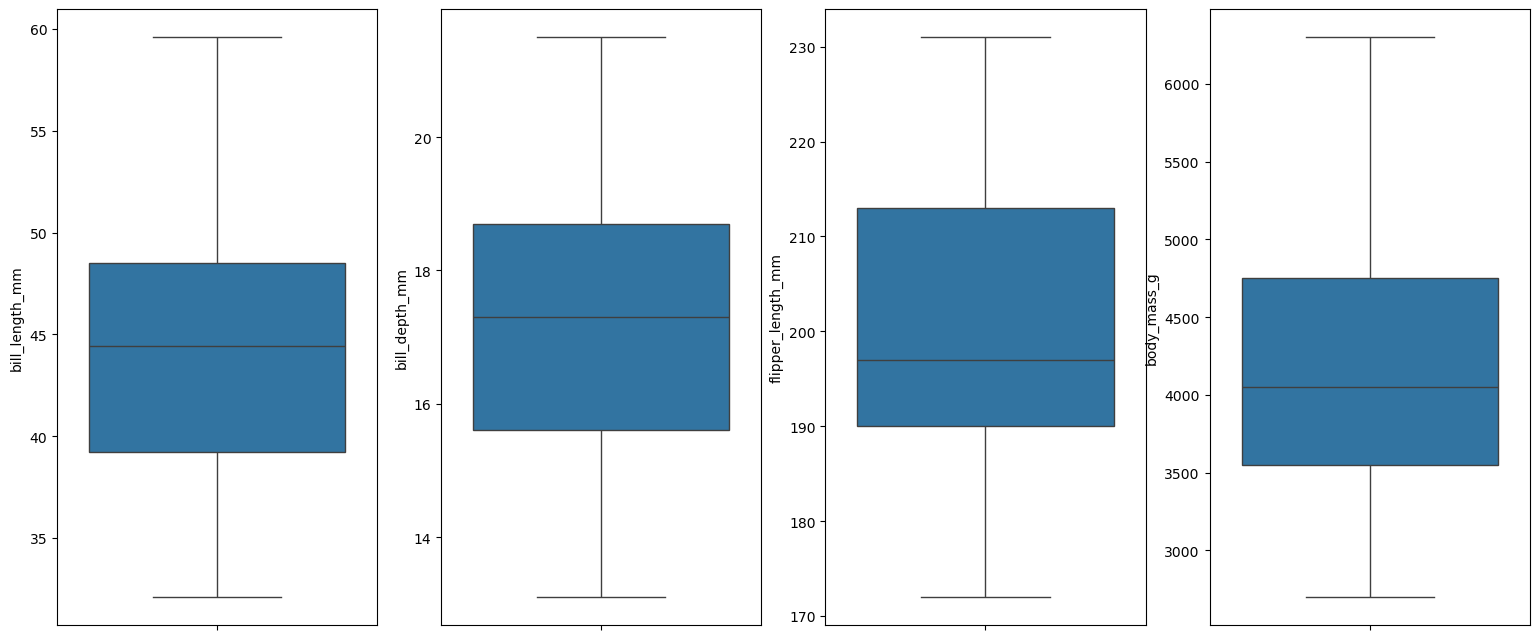

In [14]:
fig, (ax1,ax2,ax3,ax4)  = plt.subplots(1,4, figsize = (19, 8))
sns.boxplot(df['bill_length_mm'], ax = ax1)
sns.boxplot(df['bill_depth_mm'], ax = ax2)
sns.boxplot(df['flipper_length_mm'], ax = ax3)
sns.boxplot(df['body_mass_g'], ax = ax4)
plt.show()

**These graphs tell us that there are no outliers in the numeric data of the dataframe.**

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
simimp = SimpleImputer(strategy='most_frequent')
imp = KNNImputer(n_neighbors=5)

oe = OneHotEncoder(sparse_output= False)
le = LabelEncoder()

df['sex'] = df['sex'].map({'male' : 1, 'female' : 0})
df[['sex']] = simimp.fit_transform(df[['sex']])
df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g',]] = imp.fit_transform(df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']])
ct = ColumnTransformer(
    transformers=[
    ('OHE', oe  , ['island','sex'])
    ],
    remainder= 'passthrough'
)



In [16]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(sparse_output=False),
                                 ['island', 'sex'])])

In [17]:
df_transformed = ct.fit_transform(df)

In [18]:
transformed_df = pd.DataFrame(
    df_transformed,
    columns=ct.get_feature_names_out()
)

In [19]:
transformed_df.shape

(344, 11)

In [20]:
transformed_df.isna().sum()

OHE__island_Biscoe              0
OHE__island_Dream               0
OHE__island_Torgersen           0
OHE__sex_0.0                    0
OHE__sex_1.0                    0
remainder__species              0
remainder__bill_length_mm       0
remainder__bill_depth_mm        0
remainder__flipper_length_mm    0
remainder__body_mass_g          0
remainder__year                 0
dtype: int64

In [21]:
transformed_df

,OHE__island_Biscoe,OHE__island_Dream,OHE__island_Torgersen,OHE__sex_0.0,OHE__sex_1.0,remainder__species,remainder__bill_length_mm,remainder__bill_depth_mm,remainder__flipper_length_mm,remainder__body_mass_g,remainder__year
0,0.0,0.0,1.0,0.0,1.0,Adelie,39.1,18.7,181.0,3750.0,2007
1,0.0,0.0,1.0,1.0,0.0,Adelie,39.5,17.4,186.0,3800.0,2007
2,0.0,0.0,1.0,1.0,0.0,Adelie,40.3,18.0,195.0,3250.0,2007
3,0.0,0.0,1.0,0.0,1.0,Adelie,43.92193,17.15117,200.915205,4201.754386,2007
4,0.0,0.0,1.0,1.0,0.0,Adelie,36.7,19.3,193.0,3450.0,2007
...,...,...,...,...,...,...,...,...,...,...,...
339,0.0,1.0,0.0,0.0,1.0,Chinstrap,55.8,19.8,207.0,4000.0,2009
340,0.0,1.0,0.0,1.0,0.0,Chinstrap,43.5,18.1,202.0,3400.0,2009
341,0.0,1.0,0.0,0.0,1.0,Chinstrap,49.6,18.2,193.0,3775.0,2009
342,0.0,1.0,0.0,0.0,1.0,Chinstrap,50.8,19.0,210.0,4100.0,2009


### **3. Train the model**

In [22]:
from sklearn.model_selection import train_test_split
X = transformed_df.drop(columns = ['remainder__species'])
y = transformed_df['remainder__species']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

### **4. Plot Decision Tree**

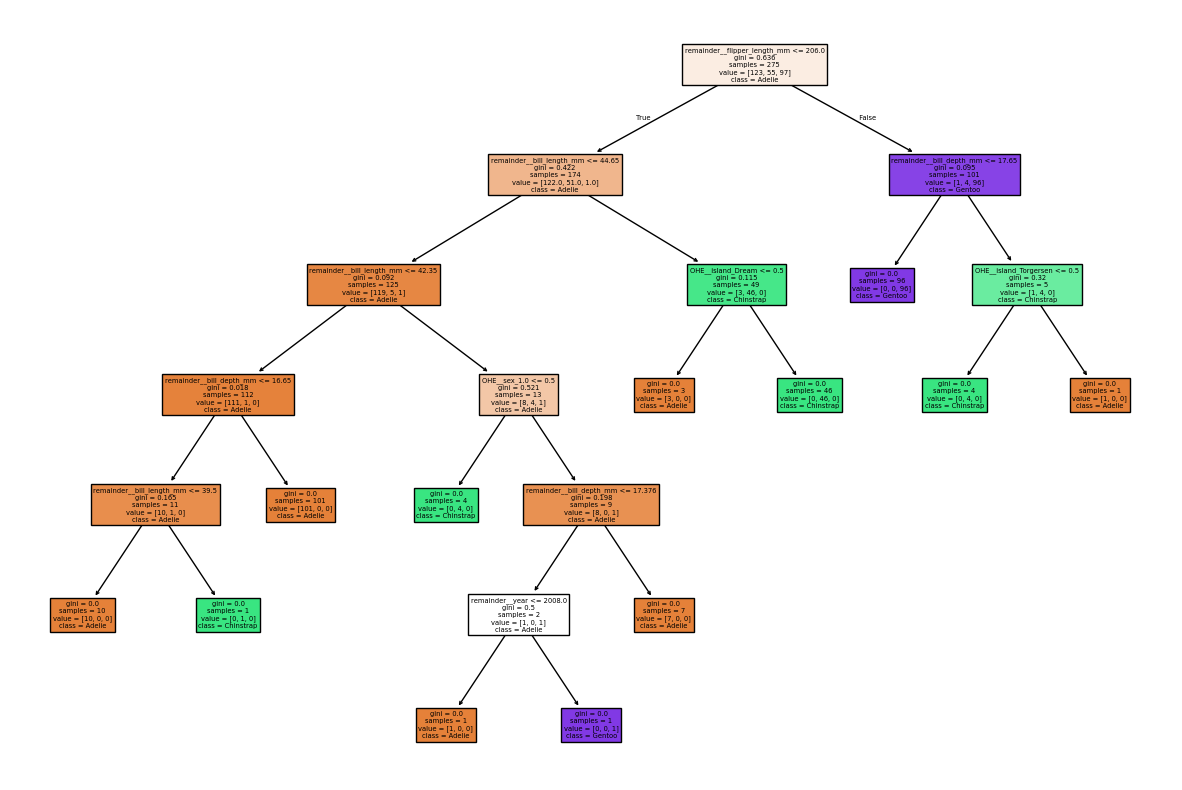

In [24]:
plt.figure(figsize=(15, 10))  # Adjust figure size for readability
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()

### **5. Evaluation**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        29
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      0.96      0.98        27

    accuracy                           0.97        69
   macro avg       0.96      0.98      0.97        69
weighted avg       0.97      0.97      0.97        69



In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        29
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      0.96      0.98        27

    accuracy                           0.97        69
   macro avg       0.96      0.98      0.97        69
weighted avg       0.97      0.97      0.97        69



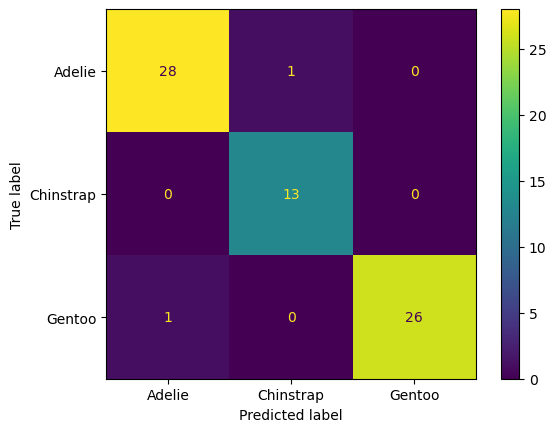

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=clf.classes_)
disp.plot()
plt.show()

### **6. Hyperparameter Tuning**

**It seems unnecesarry to perform hyperpaameter tuning when the model is this accurate, so it will be omitted.**